# Hand Written Digit Prediction- Classification Analysis

### The digits dataset consists of 8x8 images of digits. The images attribute of the dataset stores 8x8 arrays of grayscale values for each image. We will use arrays to visualize the first 4 images. The target attribute of the dataset stores the digit eah image representation

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_digits

# Import Data

In [20]:
df= load_digits()

# Data Visualization

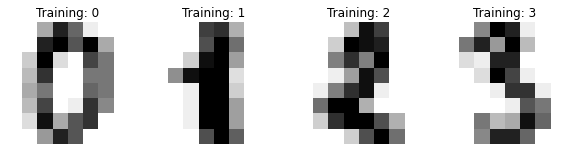

In [21]:
_,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax, image, label in zip(axes, df.images, df.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)

# Data Preprocessing

In [22]:
df.images.shape

(1797, 8, 8)

In [23]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [24]:
df.images[0].shape

(8, 8)

In [25]:
len(df.images)

1797

In [26]:
n_samples = len(df.images)
data = df.images.reshape((n_samples, -1))

In [27]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [28]:
data[0].shape

(64,)

In [29]:
data.shape

(1797, 64)

# Scaling Image Data

In [30]:
data.min

<function ndarray.min>

In [31]:
data.max

<function ndarray.max>

In [32]:
data = data/16

In [33]:
data.min()

0.0

In [34]:
data.max()

1.0

In [36]:
data[0]

array([0.    , 0.    , 0.3125, 0.8125, 0.5625, 0.0625, 0.    , 0.    ,
       0.    , 0.    , 0.8125, 0.9375, 0.625 , 0.9375, 0.3125, 0.    ,
       0.    , 0.1875, 0.9375, 0.125 , 0.    , 0.6875, 0.5   , 0.    ,
       0.    , 0.25  , 0.75  , 0.    , 0.    , 0.5   , 0.5   , 0.    ,
       0.    , 0.3125, 0.5   , 0.    , 0.    , 0.5625, 0.5   , 0.    ,
       0.    , 0.25  , 0.6875, 0.    , 0.0625, 0.75  , 0.4375, 0.    ,
       0.    , 0.125 , 0.875 , 0.3125, 0.625 , 0.75  , 0.    , 0.    ,
       0.    , 0.    , 0.375 , 0.8125, 0.625 , 0.    , 0.    , 0.    ])

# Train test split

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test= train_test_split(data,df.target,test_size=0.3)

In [39]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

# Random Forest Model

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
model = RandomForestClassifier()

In [42]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [43]:
y_pred=model.predict(X_test)

In [44]:
y_pred

array([7, 9, 6, 8, 5, 6, 9, 5, 8, 5, 1, 7, 7, 8, 9, 5, 4, 4, 5, 9, 8, 9,
       2, 8, 0, 1, 2, 3, 4, 1, 0, 2, 8, 8, 6, 3, 2, 1, 9, 5, 6, 1, 4, 8,
       9, 0, 1, 1, 7, 7, 9, 6, 8, 0, 1, 3, 4, 2, 6, 7, 1, 9, 1, 9, 3, 4,
       4, 5, 6, 1, 5, 4, 4, 4, 9, 0, 1, 0, 6, 2, 7, 0, 8, 9, 9, 8, 2, 1,
       0, 8, 7, 3, 1, 0, 6, 3, 8, 8, 8, 8, 9, 2, 5, 8, 9, 1, 8, 6, 6, 8,
       3, 8, 4, 0, 9, 9, 9, 1, 8, 9, 7, 2, 6, 3, 2, 0, 8, 9, 7, 7, 6, 3,
       2, 9, 2, 6, 3, 3, 1, 9, 7, 3, 3, 0, 9, 6, 7, 1, 1, 6, 4, 8, 1, 4,
       2, 5, 4, 4, 7, 7, 3, 2, 1, 4, 3, 8, 0, 8, 2, 6, 1, 5, 7, 9, 1, 9,
       4, 9, 4, 4, 1, 2, 1, 1, 2, 7, 2, 3, 2, 7, 3, 9, 4, 1, 5, 3, 1, 2,
       8, 8, 0, 4, 0, 7, 5, 4, 8, 1, 7, 5, 7, 1, 2, 1, 0, 8, 0, 9, 0, 5,
       5, 4, 0, 4, 3, 9, 3, 6, 1, 3, 5, 4, 2, 1, 5, 1, 9, 5, 1, 6, 8, 2,
       6, 1, 2, 5, 7, 2, 0, 0, 5, 8, 4, 6, 3, 0, 9, 5, 1, 6, 5, 1, 4, 2,
       7, 8, 9, 4, 7, 9, 4, 4, 5, 6, 3, 5, 2, 6, 1, 5, 6, 9, 9, 3, 1, 7,
       9, 9, 1, 9, 5, 4, 5, 9, 1, 6, 5, 1, 4, 4, 0,

# Model Accuracy

In [45]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [46]:
cm = confusion_matrix(y_test, y_pred)

In [47]:
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        40
           1       0.97      1.00      0.98        63
           2       1.00      1.00      1.00        48
           3       0.98      0.98      0.98        49
           4       0.97      0.99      0.98        67
           5       0.96      0.98      0.97        49
           6       1.00      0.97      0.98        63
           7       0.98      0.98      0.98        45
           8       0.96      0.94      0.95        48
           9       0.97      0.97      0.97        68

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [48]:
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")

Accuracy: 97.78%
